In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imdb import IMDb

In [2]:
# plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'w'

In [3]:
# load ratings
df_ratings = pd.read_csv('../data/Personal_Movie_Ratings_Updated.csv')
df_ratings.shape

(341, 6)

In [4]:
# drop movies missing ratings
df_ratings = df_ratings.loc[~df_ratings['My Rating'].isnull(), :].reset_index(drop=True)
df_ratings.shape

(339, 6)

In [5]:
df_ratings.head()

,Movie,My Rating,RT,Audience,IMDb,Release Year
0,LOTR: Fellowship of the Ring,4.0,91.0,95.0,88.0,2001
1,LOTR: The Two Towers,5.0,96.0,95.0,87.0,2002
2,LOTR: Return of the King,5.0,95.0,86.0,89.0,2003
3,Star Wars: Phantom Menace,2.0,55.0,59.0,65.0,1999
4,Star Wars: Attack of the Clones,2.0,67.0,59.0,67.0,2002


## Plots of Ratings Data

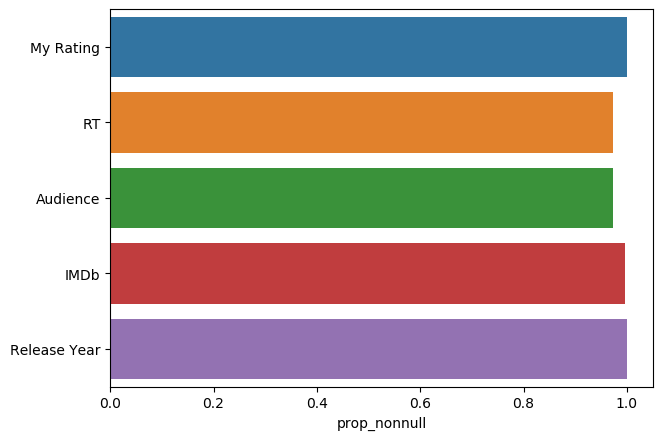

In [6]:
# visualize missing data
df_var_counts = pd.DataFrame(df_ratings.groupby('Movie').count().mean().reset_index())
df_var_counts.columns = ['var', 'prop_nonnull']
sns.barplot(x='prop_nonnull', y='var', data=df_var_counts)
plt.ylabel('')
plt.show()

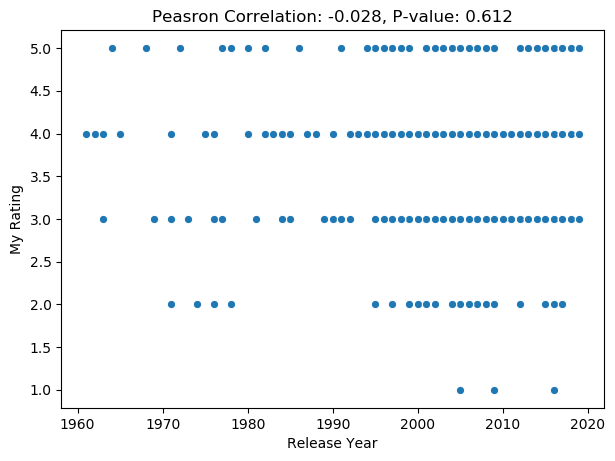

In [7]:
# correlation between year and rating
sns.scatterplot(x='Release Year', y='My Rating', data=df_ratings)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_ratings['Release Year'], df_ratings['My Rating']))
plt.show()

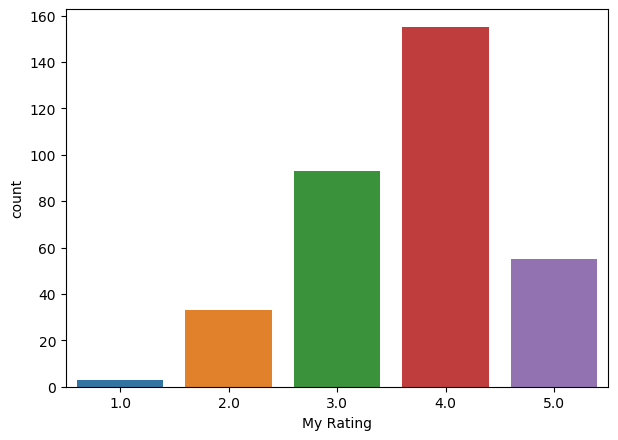

In [8]:
sns.countplot(df_ratings['My Rating'])
plt.show()

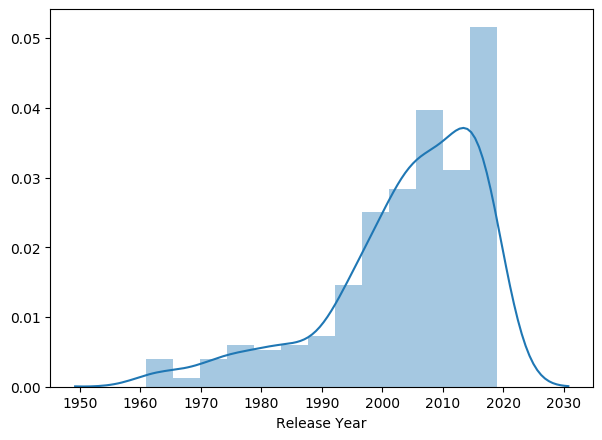

In [9]:
sns.distplot(df_ratings['Release Year'])
plt.show()

## Search for Movie in IMDb

In [10]:
# create an instance of the IMDb class
ia = IMDb()

In [11]:
# any given movie
i = 100
my_movie_title = df_ratings.Movie[i]
my_movie_year = df_ratings['Release Year'][i]
my_movie_imdb = df_ratings['IMDb'][i] / 10
my_movie_rating = df_ratings['My Rating'][i]
my_movie_title

'Mission: Impossible - Ghost Protocol'

In [12]:
# search by title first
title_search = ia.search_movie(my_movie_title)
title_search[0]

<Movie id:1229238[http] title:_Mission: Impossible - Ghost Protocol (2011)_>

In [13]:
# is the first item in search the correct movie
movie_guess = ia.get_movie(title_search[0].movieID)

In [14]:
# does the first item in the search match the release year?
movie_guess['year']==my_movie_year

True

In [15]:
# does the first item in the search match
np.abs(movie_guess['rating'] - my_movie_imdb) < 0.2

True

In [16]:
# if conditions met, return UID
movie_guess.movieID

'1229238'

In [20]:
# if not, create list of movies without UID
movies_missing_uid = {'Movie': []}
movies_missing_uid['Movie'].append(my_movie_title)
pd.DataFrame(movies_missing_uid)

,Movie
0,Mission: Impossible - Ghost Protocol


In [17]:
# initialize results container
results = {'UID':[], 'My_Rating':[],
           'Budget':[], 'Cumulative_Worldwide_Gross':[],
           'Production_Company1':[], 'Synopsis': [],
           'Top_250_Rank':[],
           'Country1':[], 'Director1':[], 'Genre1': [],
           'Genre2':[], 'Genre3':[], 'Rating':[],
           'Runtime':[], 'Title':[], 'Poster_URL': [], 'Votes':[],
           'Writer1':[], 'Writer2':[], 'Year':[]}

In [18]:
# for the movie object, try to obtain all features
results['UID'].append(movie_guess.movieID)
results['My_Rating'].append(my_movie_rating)
try:
    results['Budget'].append(movie_guess['box office']['Budget'])
except:
    results['Budget'].append('')
try:
    results['Cumulative_Worldwide_Gross'].append(movie_guess['box office']['Cumulative Worldwide Gross'])
except:
    results['Cumulative_Worldwide_Gross'].append('')
try:
    results['Production_Company1'].append(movie_guess['production companies'][0]['name'])
except:
    results['Production_Company1'].append('')
try:
    results['Synopsis'].append(movie_guess['synopsis'][0])
except:
    results['Synopsis'].append('')
try:
    results['Top_250_Rank'].append(movie_guess['top 250 rank'])
except:
    results['Top_250_Rank'].append('')
try:
    results['Country1'].append(movie_guess['countries'][0])
except:
    results['Country1'].append('')
try:
    results['Director1'].append(movie_guess['directors'][0]['name'])
except:
    results['Director1'].append('')
try:
    results['Genre1'].append(movie_guess['genres'][0])
except:
    results['Genre1'].append('')
try:
    results['Genre2'].append(movie_guess['genres'][1])
except:
    results['Genre2'].append('')
try:
    results['Genre3'].append(movie_guess['genres'][2])
except:
    results['Genre3'].append('')
try:
    results['Rating'].append(movie_guess['rating'])
except:
    results['Rating'].append('')
try:
    results['Runtime'].append(movie_guess['runtimes'][0])
except:
    results['Runtime'].append('')
try:
    results['Title'].append(movie_guess['title'])
except:
    results['Title'].append('')
try:
    results['Poster_URL'].append(movie_guess['full-size cover url'])
except:
    results['Poster_URL'].append('')
try:
    results['Votes'].append(movie_guess['votes'])
except:
    results['Votes'].append('')
try:
    results['Writer1'].append(movie_guess['writer'][0]['name'])
except:
    results['Writer1'].append('')
try:
    results['Writer2'].append(movie_guess['writer'][1]['name'])
except:
    results['Writer2'].append('')
try:
    results['Year'].append(movie_guess['year'])
except:
    results['Year'].append('')

In [19]:
pd.DataFrame(results)

,UID,My_Rating,Budget,Cumulative_Worldwide_Gross,Production_Company1,Synopsis,Top_250_Rank,Country1,Director1,Genre1,Genre2,Genre3,Rating,Runtime,Title,Poster_URL,Votes,Writer1,Writer2,Year
0,1229238,3.0,"$145,000,000 (estimated)","$694,713,380, 12 Apr 2012",Paramount Pictures,On assignment in Budapest to intercept a couri...,,United States,Brad Bird,Action,Adventure,Thriller,7.4,132,Mission: Impossible - Ghost Protocol,https://m.media-amazon.com/images/M/MV5BMTY4MT...,441490,Bruce Geller,Josh Appelbaum,2011


In [21]:
results['Poster_URL']

['https://m.media-amazon.com/images/M/MV5BMTY4MTUxMjQ5OV5BMl5BanBnXkFtZTcwNTUyMzg5Ng@@.jpg']